In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import skimage.io as skio
import skimage
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 150
import tifffile
import numpy as np
from utils import substract_background, take_only_walkers_on_fibre

In [9]:
#
# stack = skio.imread('../2021-09-27__prelim_data/2B9_SingleMolecule_1nM_A8fibres_25C_75mMNaCl_100-200.tif')
in_file=r"D:\data\2022-04-26_WALKER_DATA\AjasjaRollerData\25C_75mMNaCl_A8fibres\2B9\2B9_SingleMolecule_1nM_A8fibres_25C_75mMNaCl_1.tif"
stack = skio.imread(in_file)

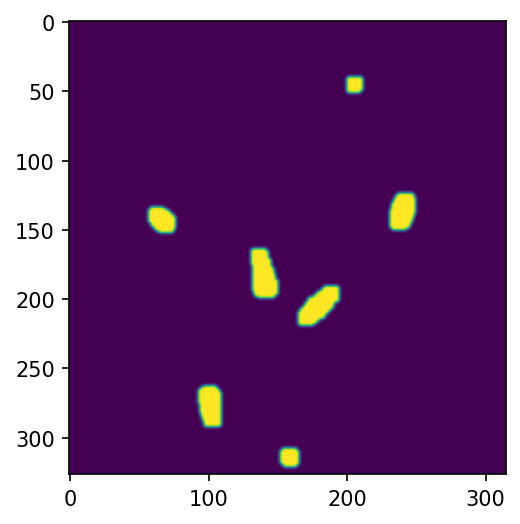

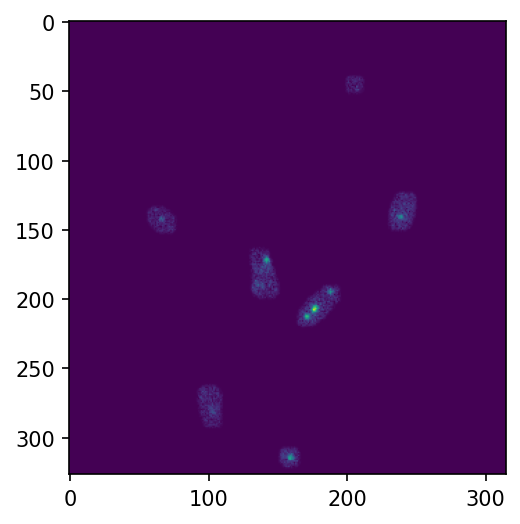

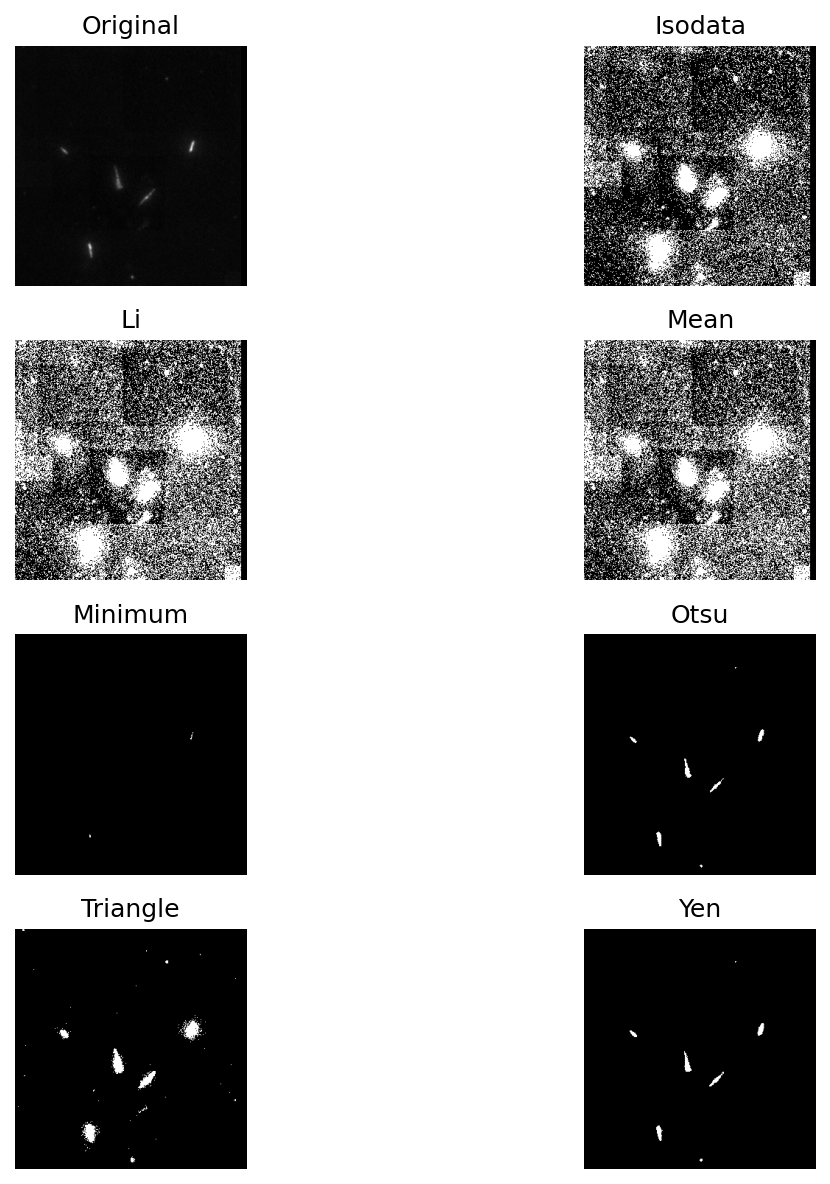

In [23]:


frame0_fibre=stack[-1, 0, :, :]
frame0_walker=stack[-1, 1, :, :]


#
frame0_walker = substract_background(frame0_walker, radius=20)

#frame0_walker = frame0_walker - background
new_walker = take_only_walkers_on_fibre(frame0_fibre, frame0_walker)



plt.imshow(new_walker)

from skimage.filters import try_all_threshold

frame0_fibre = substract_background(frame0_fibre, radius=100)
frame0_fibre = skimage.exposure.rescale_intensity(frame0_fibre, in_range='image', out_range='uint8')
fig, ax = try_all_threshold(frame0_fibre, figsize=(10, 8), verbose=False)
plt.show()

In [78]:
dims = stack.shape
#skip the channel?
new_dims = (dims[0], dims[2], dims[3]) 
out = np.zeros(new_dims, dtype=np.uint8)
for i in range(dims[0]):
    frame_fibre=stack[i, 0, :, :]
    frame_walker=stack[i, 1, :, :]
    
    new = take_only_walkers_on_fibre(frame_fibre, frame_walker)
    
    out[i] = new

In [83]:
tifffile.imwrite('test.tif', out , imagej=True, dtype=np.uint8, 
    metadata={'axes': 'TYX'})

tifffile.imwrite('test.ome.tif', out , ome=True, dtype=np.uint8, 
    photometric='minisblack', metadata={'axes': 'TYX'})

tifffile.imwrite('test.zlib.ome.tif', out , ome=True, dtype=np.uint8, 
    photometric='minisblack', metadata={'axes': 'TYX'}, compression='zlib')

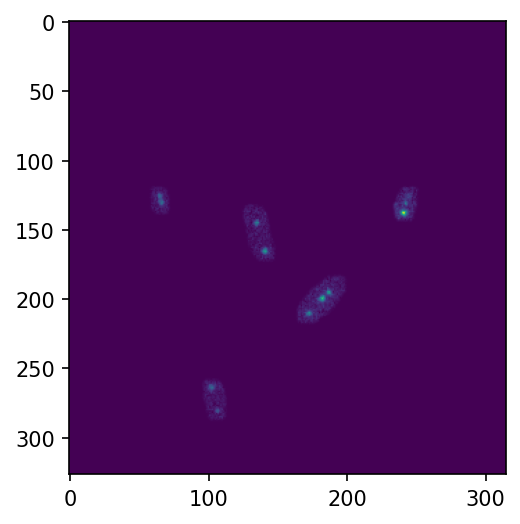

In [71]:
plt.imshow(out[1])